In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [28]:
df = pd.DataFrame([{'X': 43, 'Y': 99},
                   {'X': 21, 'Y': 65},
                   {'X': 25, 'Y': 79},
                   {'X': 42, 'Y': 75},
                   {'X': 57, 'Y': 87},
                   {'X': 59, 'Y': 81}])
df

,X,Y
0,43,99
1,21,65
2,25,79
3,42,75
4,57,87
5,59,81


In [29]:
df['XY'] = df['X'] * df['Y']
df['X^2'] = df['X']**2
df['Y^2'] = df['Y']**2
df.loc['SUM'] = df.sum(axis=0)
df

,X,Y,XY,X^2,Y^2
0,43,99,4257,1849,9801
1,21,65,1365,441,4225
2,25,79,1975,625,6241
3,42,75,3150,1764,5625
4,57,87,4959,3249,7569
5,59,81,4779,3481,6561
SUM,247,486,20485,11409,40022


#1

In [48]:
df.drop(df.index[-1]) #dropping the sum row to accurately get correlation coefficient
r = df.corr()
print(r)
print("The correlation coefficient between X and Y is 0.529809, so they are weakly correlated")

          X         Y
X  1.000000  0.529809
Y  0.529809  1.000000
The correlation coefficient between X and Y is 0.529809, so they are weakly correlated


#2

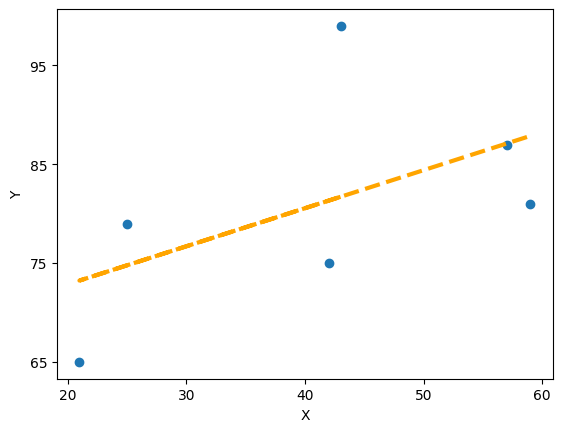

In [31]:
#1: Define dataset
X= df.iloc[0:-1, 0]
Y= df.iloc[0:-1, 1]

#2: create a scatter plot
plt.scatter(X, Y)

#3: calculate an equation for a trendline
z = np.polyfit(X, Y, 1)
t = np.poly1d(z)

#4: add a trendline
plt.plot(X, t(X), c="Orange", linewidth=3, linestyle="--")

plt.xticks(np.arange(20, 61, 10))
plt.yticks(np.arange(65, 101, 10))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#3

In [32]:
#Using PyTorch
import torch
import torch.optim as optim

#1: define the dataset
X = torch.FloatTensor([[43],
                      [21],
                      [25],
                      [42],
                      [57],
                      [59]]) #2D X data, shape is 6x1

Y = torch.FloatTensor([[99],
                      [65],
                      [79],
                      [75],
                      [87],
                      [81]]) #2D Y data, shape is 6x1

#Step 2: Define W and b and initialize them with 0
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#Step 3: Optimizer setting
"""
Optimizer: Optimization is the process of adjusting model parameters (W and b)
to reduce model error in each training step (epochs)
"""
optimizer = optim.SGD([W, b], lr=1e-5)

#Step 4: Model training
for epoch in range(2001):
  hypothesis = W * X + b #This is our model to find the most optimized values of W and b
  cost = torch.mean((hypothesis - Y)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #Step 5: Display results
  if epoch % 100 == 0:
    print("Epoch {:4d} / {} W: {:.3f}, b: {:.3f} Cost: {:.6f}".
          format(epoch, epoch, W.item(), b.item(), cost.item()))

Epoch    0 / 0 W: 0.068, b: 0.002 Cost: 6670.333496
Epoch  100 / 100 W: 1.759, b: 0.052 Cost: 542.023621
Epoch  200 / 200 W: 1.793, b: 0.067 Cost: 539.205139
Epoch  300 / 300 W: 1.794, b: 0.081 Cost: 539.003662
Epoch  400 / 400 W: 1.794, b: 0.096 Cost: 538.803528
Epoch  500 / 500 W: 1.793, b: 0.110 Cost: 538.603577
Epoch  600 / 600 W: 1.793, b: 0.124 Cost: 538.403503
Epoch  700 / 700 W: 1.793, b: 0.138 Cost: 538.203674
Epoch  800 / 800 W: 1.792, b: 0.152 Cost: 538.003784
Epoch  900 / 900 W: 1.792, b: 0.166 Cost: 537.804260
Epoch 1000 / 1000 W: 1.792, b: 0.180 Cost: 537.604553
Epoch 1100 / 1100 W: 1.791, b: 0.195 Cost: 537.405029
Epoch 1200 / 1200 W: 1.791, b: 0.209 Cost: 537.205627
Epoch 1300 / 1300 W: 1.791, b: 0.223 Cost: 537.006226
Epoch 1400 / 1400 W: 1.790, b: 0.237 Cost: 536.806946
Epoch 1500 / 1500 W: 1.790, b: 0.251 Cost: 536.607727
Epoch 1600 / 1600 W: 1.790, b: 0.265 Cost: 536.408752
Epoch 1700 / 1700 W: 1.790, b: 0.279 Cost: 536.209778
Epoch 1800 / 1800 W: 1.789, b: 0.293 Co

In [33]:
#Using TensorFlow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Step 1: Define the dataset
x = [43, 21, 25, 42, 57, 59]
y = [99, 65, 79, 75, 87, 81]

#Step 2: Define global variables
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Step 3: Define a hypothesis
hypothesis = W * x + b

#Step 4: Define a loss (cost) function
cost = tf.reduce_mean(tf.square(hypothesis - y))

#Step 5: Define an optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

#Step 6: Model training
with tf.Session() as sess: #Open session for model training
  #Step 6-1: Initialize global variables
  sess.run(tf.global_variables_initializer())

  #Step 6-2: for loop to define epochs
  for epochs in range(2001):
    optim, cost_val, W_val, b_val = sess.run([optimizer, cost, W, b])

    if epochs % 100 == 0:
      print("epochs:", epochs, "Cost: ", cost_val, "Weight: ", W_val, "Bias: ", b_val)

epochs: 0 Cost:  1769.9224 Weight:  [1.0428805] Bias:  [-0.80178726]
epochs: 100 Cost:  551.66406 Weight:  [1.796371] Bias:  [-0.7711348]
epochs: 200 Cost:  550.9382 Weight:  [1.8116419] Bias:  [-0.75646883]
epochs: 300 Cost:  550.7327 Weight:  [1.8116539] Bias:  [-0.7421362]
epochs: 400 Cost:  550.5274 Weight:  [1.8113493] Bias:  [-0.7278132]
epochs: 500 Cost:  550.32227 Weight:  [1.8110393] Bias:  [-0.7134939]
epochs: 600 Cost:  550.11725 Weight:  [1.8107294] Bias:  [-0.69917685]
epochs: 700 Cost:  549.9123 Weight:  [1.8104194] Bias:  [-0.684864]
epochs: 800 Cost:  549.70746 Weight:  [1.8101095] Bias:  [-0.6705529]
epochs: 900 Cost:  549.5027 Weight:  [1.8097998] Bias:  [-0.6562465]
epochs: 1000 Cost:  549.298 Weight:  [1.8094901] Bias:  [-0.64194137]
epochs: 1100 Cost:  549.09326 Weight:  [1.8091805] Bias:  [-0.62764144]
epochs: 1200 Cost:  548.8887 Weight:  [1.8088709] Bias:  [-0.6133423]
epochs: 1300 Cost:  548.6843 Weight:  [1.8085614] Bias:  [-0.5990488]
epochs: 1400 Cost:  548.

In [34]:
#Using scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame([{'X': 43, 'Y': 99},
                   {'X': 21, 'Y': 65},
                   {'X': 25, 'Y': 79},
                   {'X': 42, 'Y': 75},
                   {'X': 57, 'Y': 87},
                   {'X': 59, 'Y': 81}])
df

,X,Y
0,43,99
1,21,65
2,25,79
3,42,75
4,57,87
5,59,81


In [35]:
x = df["X"]
y = df["Y"]
lr = LinearRegression()
lr.fit(x.values.reshape(6, 1), y)
y_pred = lr.predict(x.values.reshape(6, 1))

print("Cost value: ", mean_squared_error(y, y_pred))
print("Weight value: ", lr.coef_)
print("Bias value: ", lr.intercept_)

Cost value:  78.64374300425344
Weight value:  [0.38522498]
Bias value:  65.1415715245131




1.   PyTorch: H(x) =  W * X + b,
W: 1.789, b: 0.321, Cost: 535.613281
2.   TensorFlow: H(x) =  W * X + b,
Cost:  547.1247 Weight:  [1.8061982] Bias:  [-0.48988822]
3.    Scikit-learn: H(x) = LinearRegression().fit(x.values.reshape(6, 1), y),
Cost value:  78.64374300425344
Weight value:  [0.38522498]
Bias value:  65.1415715245131



#4
PyTorch and TensorFlow have the trendline equation most similar to MS-Excel.

#5

In [36]:
#for a 47 year old
print("Predicted glucose level from PyTorch: ", (1.789 * 47) + 0.321)
print("Predicted glucose level from TensorFlow: ", (1.8061982 * 47) - 0.48988822)
print("Predicted glucose level from scikit-learn: ", lr.predict([[47]]))

Predicted glucose level from PyTorch:  84.404
Predicted glucose level from TensorFlow:  84.40142718000001
Predicted glucose level from scikit-learn:  [83.24714574]


#6
1. Minimum cost: 540.16
2. The corresponding value of gradient: -8.41
3. The corresponding value of weight: 1.79

Gradient: -6828.33, W: 0.00, Cost: 6670.33
Gradient: -4231.52, W: 0.68, Cost: 2894.32
Gradient: -2622.27, W: 1.11, Cost: 1444.22
Gradient: -1625.02, W: 1.37, Cost: 887.34
Gradient: -1007.03, W: 1.53, Cost: 673.48
Gradient: -624.05, W: 1.63, Cost: 591.36
Gradient: -386.73, W: 1.69, Cost: 559.82
Gradient: -239.65, W: 1.73, Cost: 547.71
Gradient: -148.51, W: 1.76, Cost: 543.05
Gradient: -92.03, W: 1.77, Cost: 541.27
Gradient: -57.03, W: 1.78, Cost: 540.58
Gradient: -35.34, W: 1.79, Cost: 540.32
Gradient: -21.90, W: 1.79, Cost: 540.22
Gradient: -13.57, W: 1.79, Cost: 540.18
Gradient: -8.41, W: 1.79, Cost: 540.16
Gradient: -5.21, W: 1.79, Cost: 540.16
Gradient: -3.23, W: 1.79, Cost: 540.16
Gradient: -2.00, W: 1.79, Cost: 540.16
Gradient: -1.24, W: 1.80, Cost: 540.16
Gradient: -0.77, W: 1.80, Cost: 540.16
Gradient: -0.48, W: 1.80, Cost: 540.16


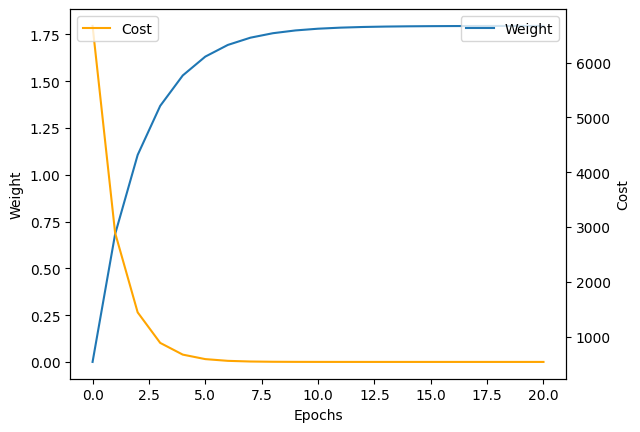

In [41]:
x_axis = [] #epochs
y1_axis = [] #weight
y2_axis = [] #cost

x = torch.FloatTensor([[43],
                      [21],
                      [25],
                      [42],
                      [57],
                      [59]]) #2D X data, shape is 6x1

y = torch.FloatTensor([[99],
                      [65],
                      [79],
                      [75],
                      [87],
                      [81]]) #2D Y data, shape is 6x1

W = torch.zeros(1)
lr = 1e-4

for epoch in range(21):
  hypothesis = W * x
  cost = torch.mean((hypothesis - y)**2)
  gradient = 2 * torch.mean((hypothesis - y)*x)

  x_axis.append(epoch)
  y1_axis.append(W.item())
  y2_axis.append(cost.item())

  print("Gradient: {:.2f}, W: {:.2f}, Cost: {:.2f}".
      format(gradient.item(), W.item(), cost.item()))

  W -= lr * gradient #W = W - learning rate * gradient

fig, x1 = plt.subplots()
x1.set_xlabel("Epochs")
x1.set_ylabel("Weight")
x1.plot(x_axis, y1_axis, label = "Weight")
x1.legend(loc = "upper right")

x2 = x1.twinx()
x2.set_ylabel("Cost")
x2.plot(x_axis, y2_axis, label = "Cost", c="Orange")
x2.legend(loc = "upper left")
plt.show()